In [2]:
import numpy as np
import scipy.stats as sps
import pandas as pd
from gaussian_mixture_anomaly_detection import GaussianMixtureInTimeAnomalyDetector
from gaussian_mixture_anomaly_detection import extract_anomaly_target
import matplotlib.pyplot as plt
%matplotlib inline

простой пример: 10 двумерных временных рядов по 10 элементов в каждом,лежащие на 3x=2y со случайным нормальным смещением, а также 4 аномальные точки

In [19]:
T = 10
F = 40
N = 2

data = np.zeros((F, T, N))

for i in range(F):
    for t in range(T):
        data[i][t] = np.array([2,3]) * t + sps.norm.rvs(size=2,scale=0.5)
        
anomalies = [(0,5,0), (1,3,1), (1,4,1), (2,8,1), (3,2,0)]
for a in anomalies:
    data[a[0]][a[1]][a[2]] += 5

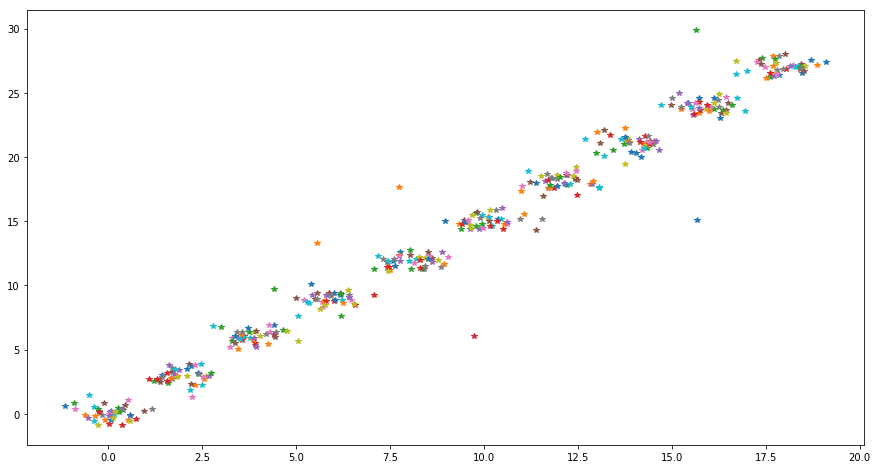

In [21]:
plt.figure(figsize=(15,8))
for i in range(F):
    plt.plot(data[i][:, 0], data[i][:, 1], '*')
# plt.grid()
plt.show()

In [22]:
detector = GaussianMixtureInTimeAnomalyDetector(n_components=10, random_state=1)

In [23]:
scores = detector.fit(data)  # scores  - логарифмическое правдоподобие нормальности для каждого сэмпла

100%|██████████| 40/40 [00:00<00:00, 375.83it/s]

Start probabilities memorization


выявление аномальных сэмплов:

In [24]:
detector.find_anomalies(scores, log_likelihood_threshold=0)

([(-21.708055543024216, (3, 2)),
  (-18.023088404902232, (0, 5)),
  (-13.681489741810392, (2, 8)),
  (-12.264026051217696, (1, 4)),
  (-10.988716616440255, (1, 3)),
  (-2.2571935415558402, (23, 2)),
  (-1.0289126462818712, (33, 5)),
  (-0.60114392843052877, (8, 1)),
  (-0.55510842385183368, (1, 9)),
  (-0.30299069643565618, (5, 4)),
  (-0.25159030141824712, (7, 7))],
 0)

In [25]:
detector.find_anomalies(scores, anomaly_top=0.05)

([(-21.708055543024216, (3, 2)),
  (-18.023088404902232, (0, 5)),
  (-13.681489741810392, (2, 8)),
  (-12.264026051217696, (1, 4)),
  (-10.988716616440255, (1, 3)),
  (-2.2571935415558402, (23, 2)),
  (-1.0289126462818712, (33, 5)),
  (-0.60114392843052877, (8, 1)),
  (-0.55510842385183368, (1, 9)),
  (-0.30299069643565618, (5, 4)),
  (-0.25159030141824712, (7, 7)),
  (0.0011760625099622576, (10, 0)),
  (0.050444959729398747, (37, 8)),
  (0.18065315452216879, (3, 8)),
  (0.20017858205411865, (0, 8)),
  (0.23048940764874823, (9, 1)),
  (0.51144461974685673, (36, 3)),
  (0.54261660363067821, (3, 4)),
  (0.548223667922772, (14, 4)),
  (0.58640171264254703, (30, 1)),
  (0.5970579668346957, (10, 1))],
 0.5970579668346957)

как видно аномалии попали в топ 5%

In [26]:
detector.find_anomalies(scores, anomaly_top=0.1, strategy='series')

([(-4.8240815572081814, 3),
  (-4.0581701612917715, 1),
  (1.5649762026788594, 0),
  (6.7481099927732462, 2),
  (17.304787307194438, 8)],
 17.304787307194438)

2 ряда с добавленными аномалиями попали в топ по сумме логорифимических правдоподобий

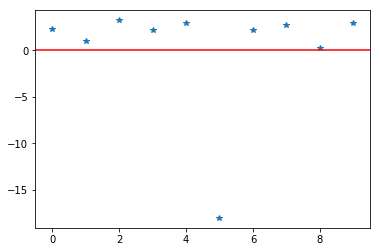

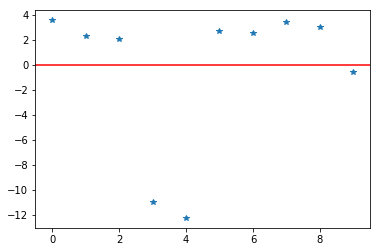

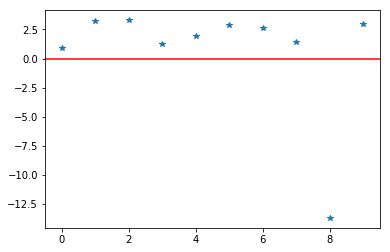

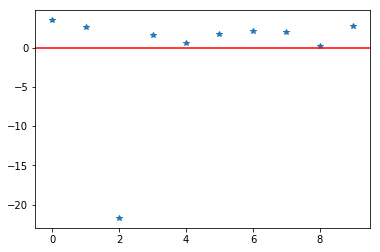

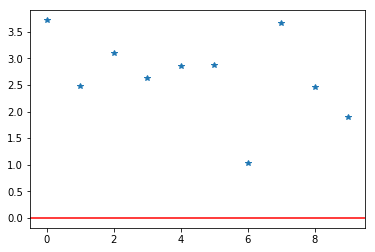

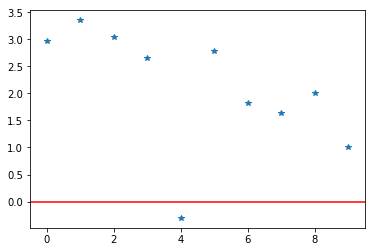

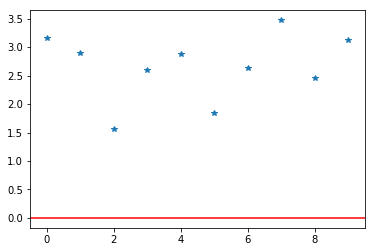

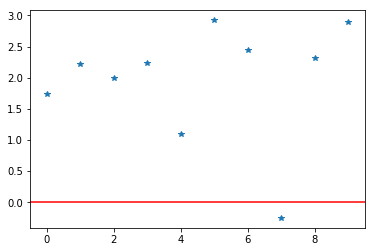

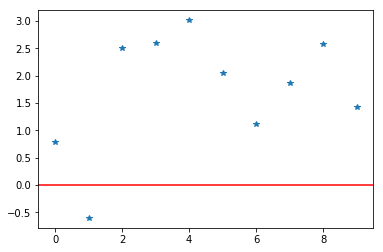

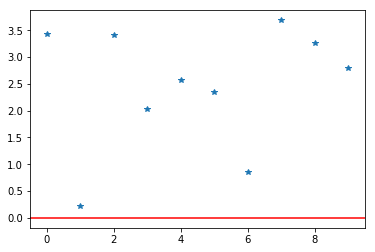

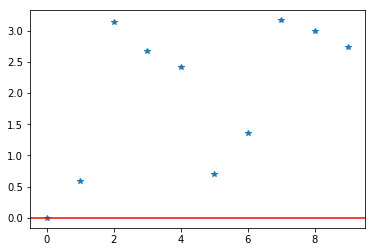

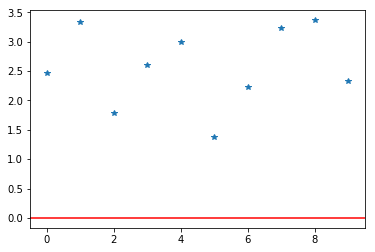

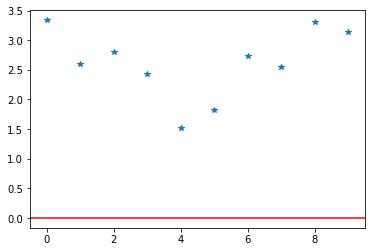

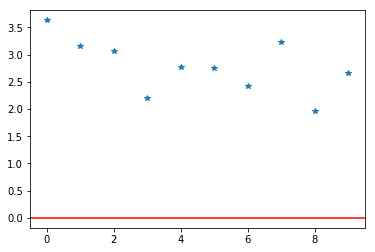

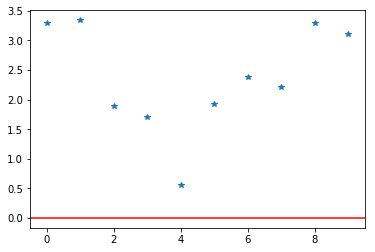

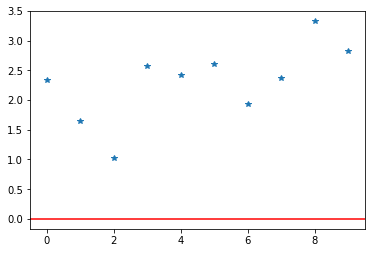

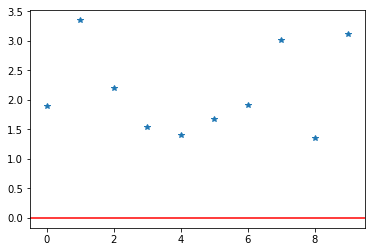

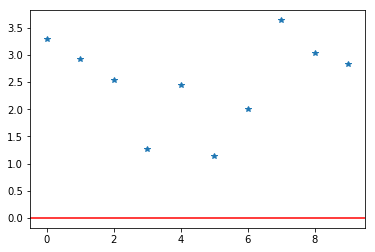

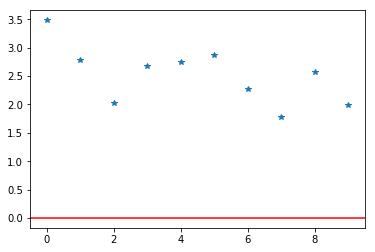

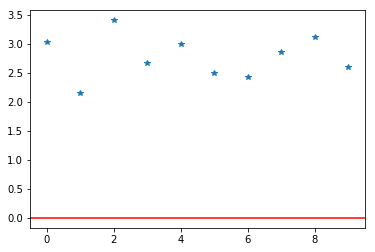

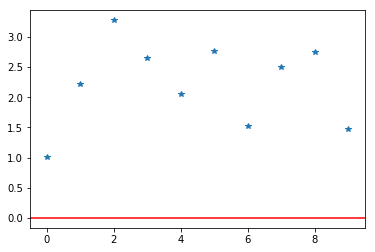

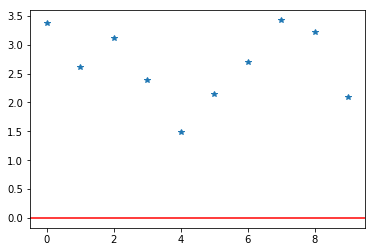

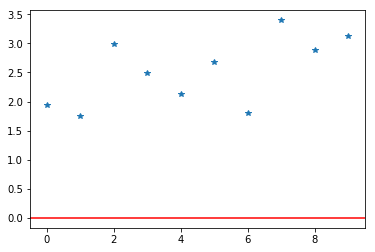

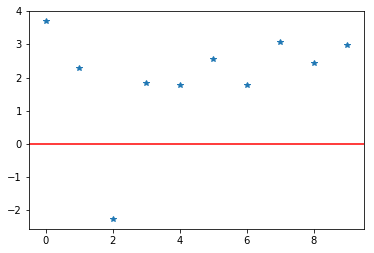

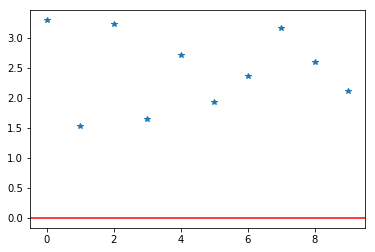

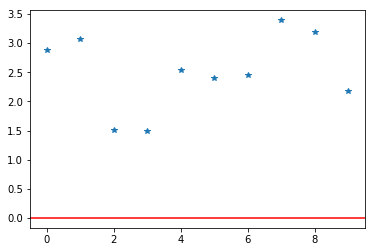

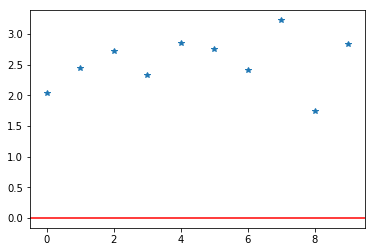

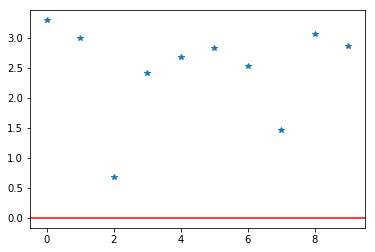

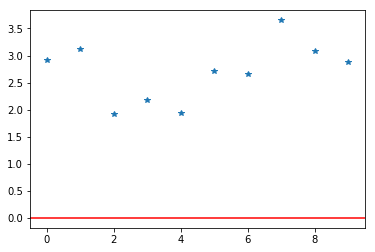

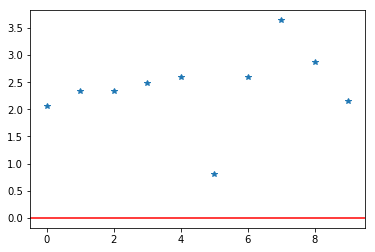

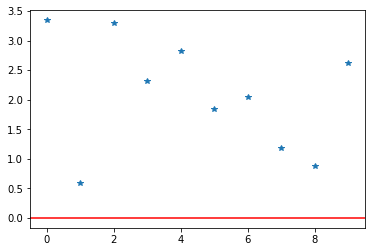

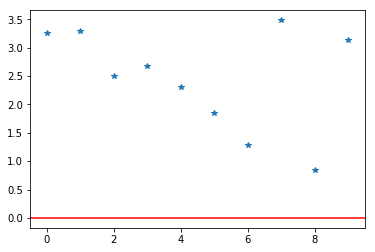

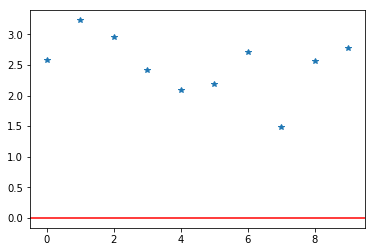

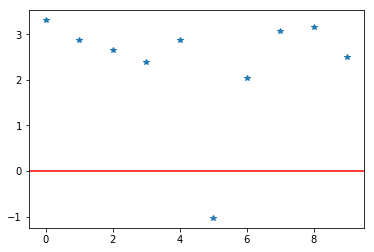

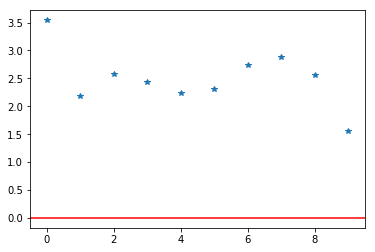

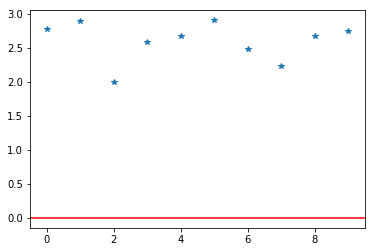

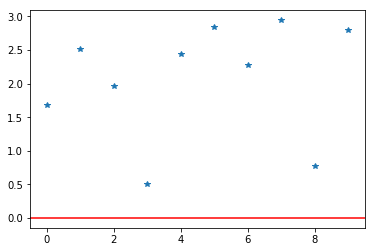

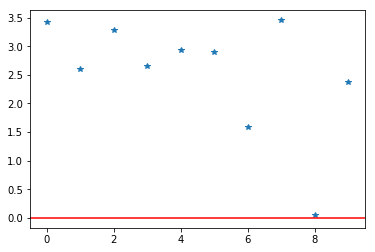

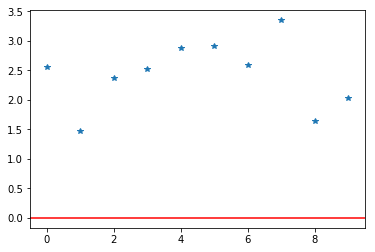

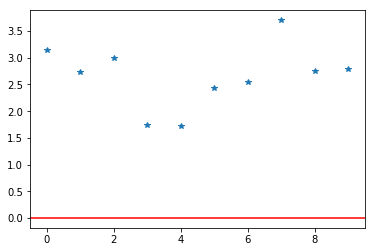

In [27]:
for f in range(F):
    plt.plot(range(T), scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()

In [28]:
smoothed_scores = detector.smoothed_sample_anomalies(scores, halflife=2)

/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


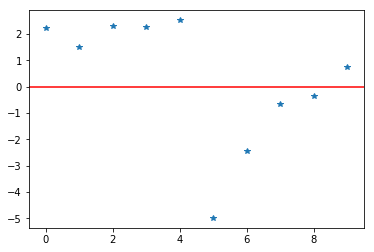

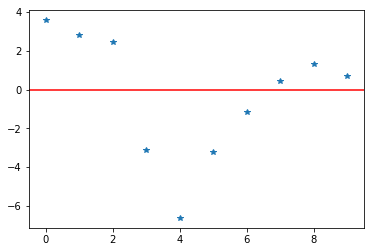

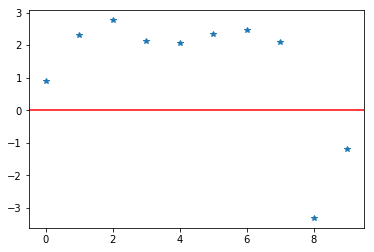

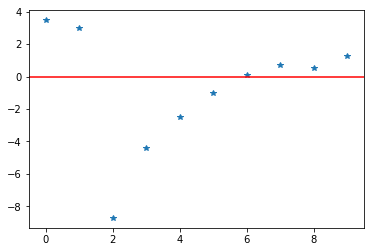

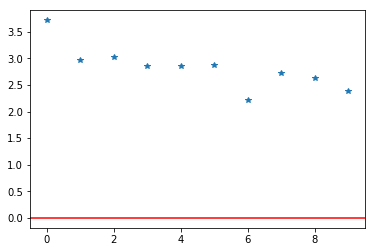

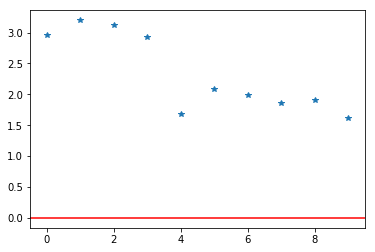

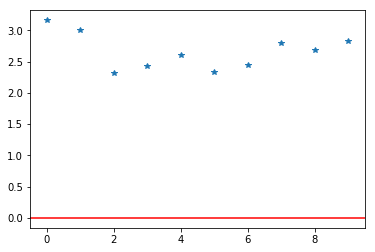

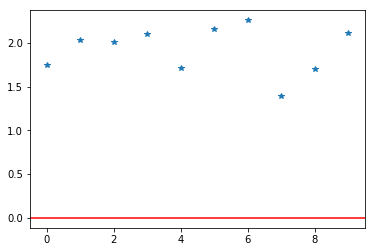

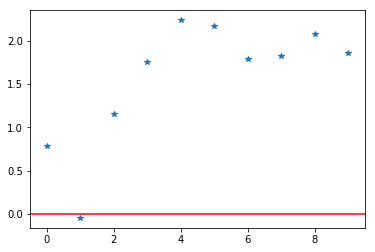

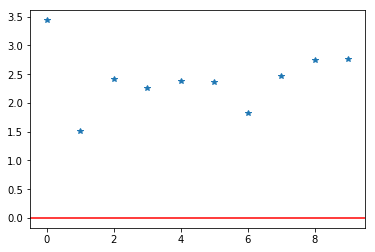

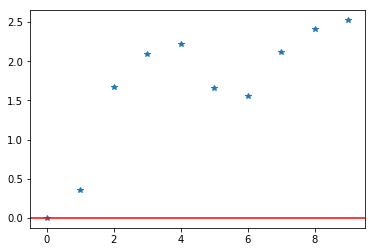

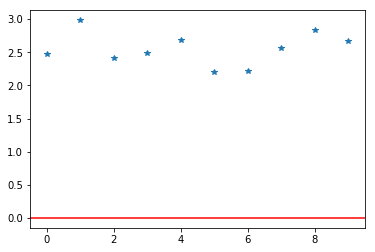

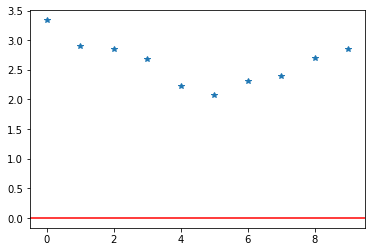

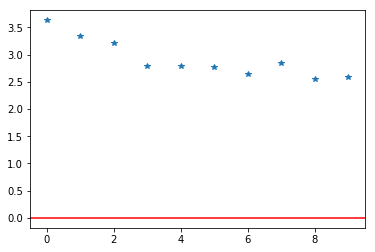

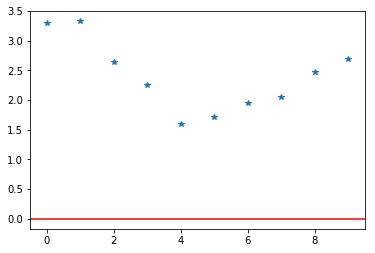

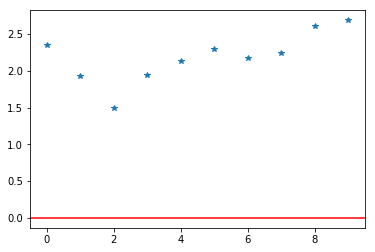

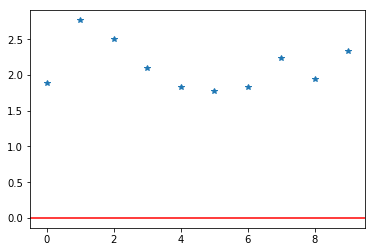

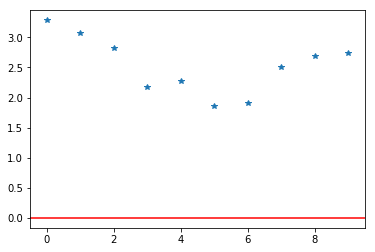

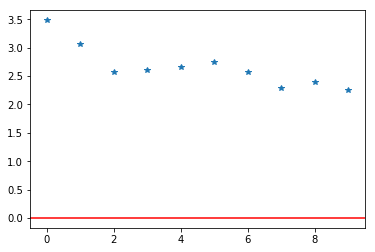

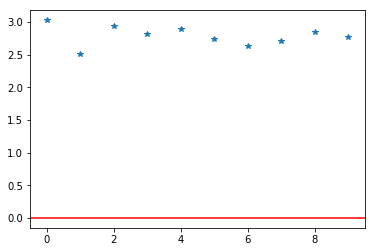

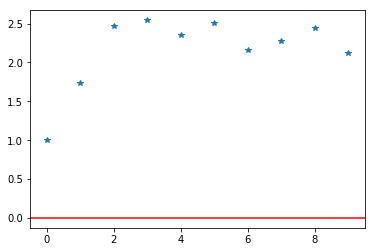

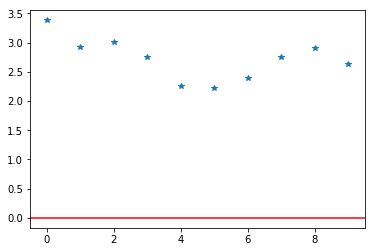

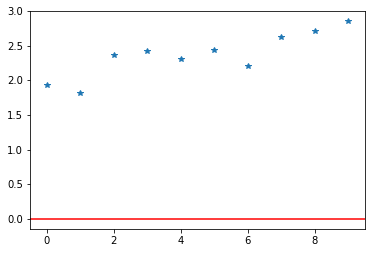

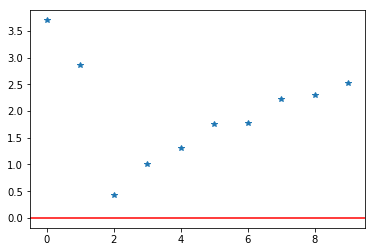

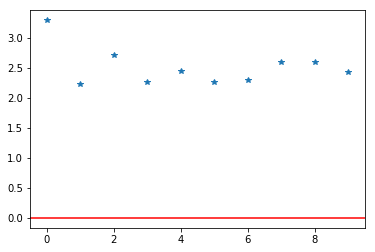

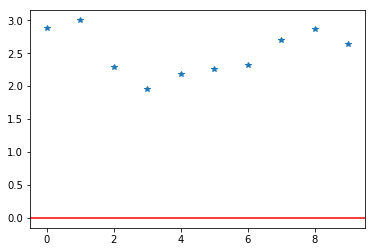

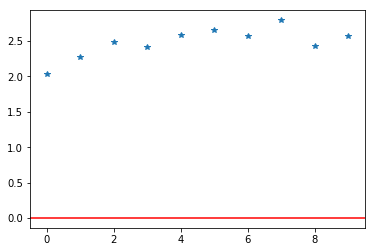

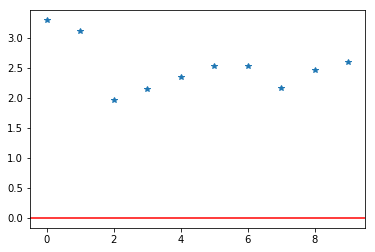

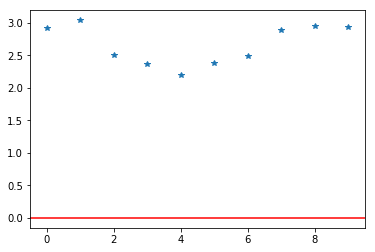

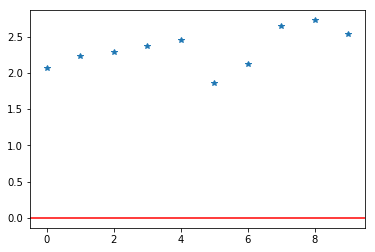

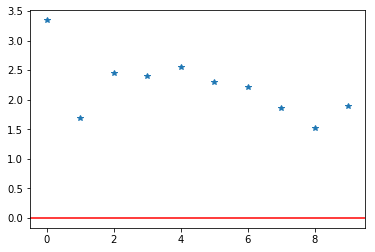

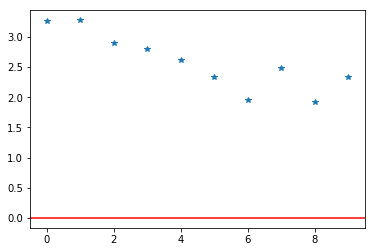

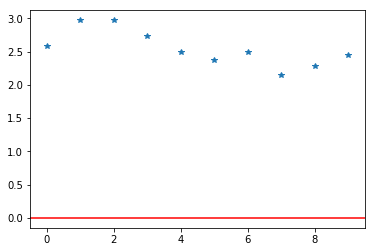

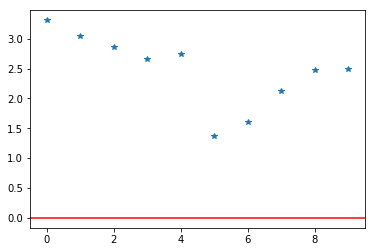

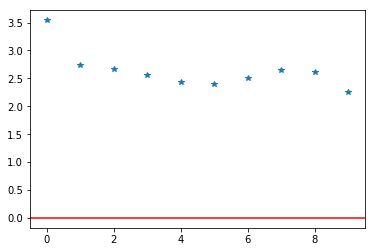

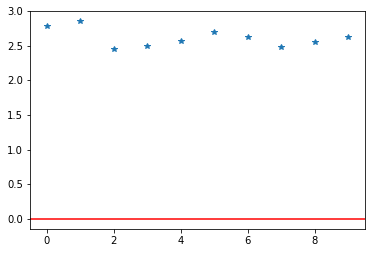

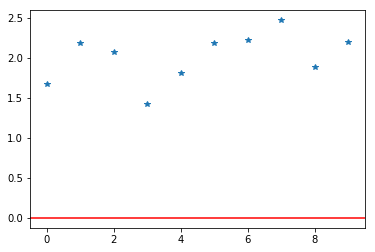

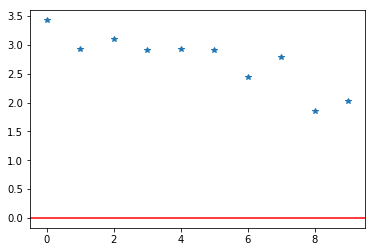

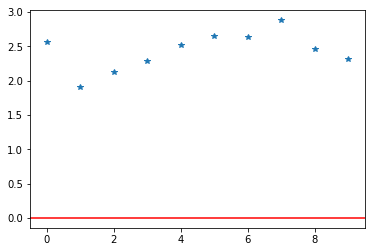

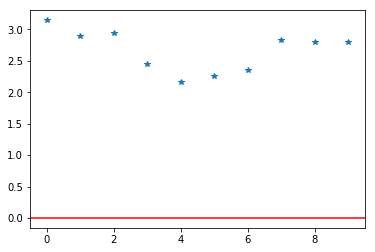

In [29]:
for f in range(F):
    plt.plot(range(T), smoothed_scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()

In [30]:
targets =  extract_anomaly_target(pd.DataFrame(data.reshape(40 * 10, 2)), 40, 1, 2, 10, 0.01)
smoothed_scores = detector.smoothed_sample_anomalies(scores)

100%|██████████| 10/10 [00:00<00:00, 73.64it/s]

Start probabilities memorization



/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=1,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])
/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


In [31]:
targets.shape

(400,)

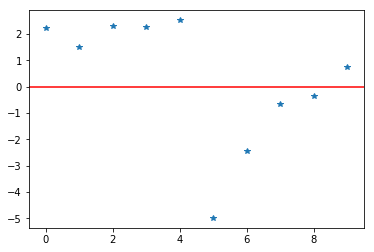

[ 0.  0.  0.  0.  1.  1.  0.  0.  0.  0.]


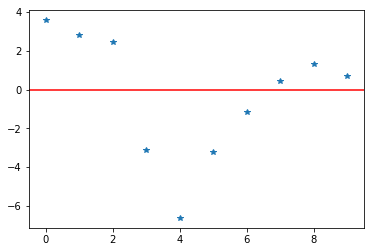

[ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]


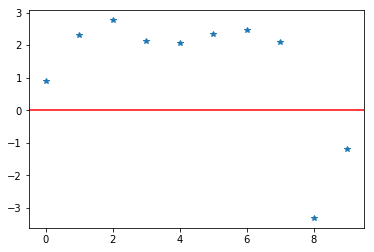

[ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]


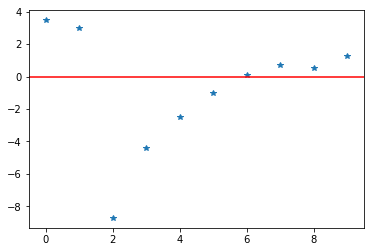

[ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]


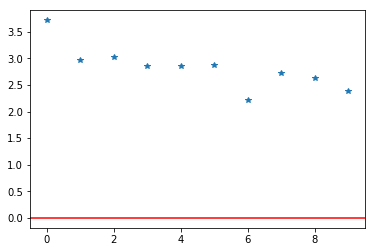

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


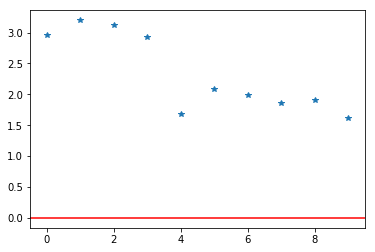

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


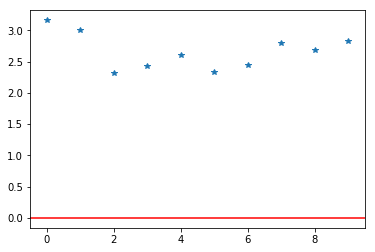

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


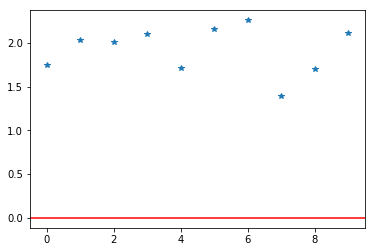

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


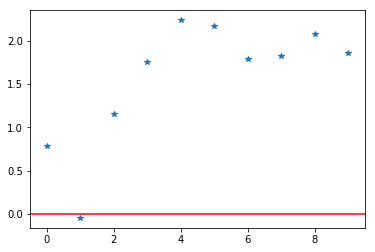

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


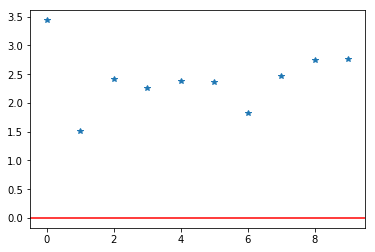

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


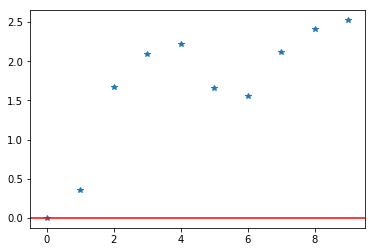

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


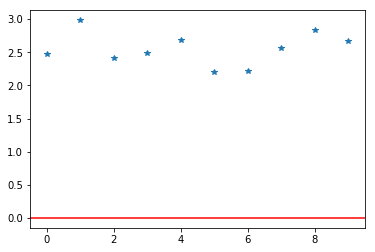

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


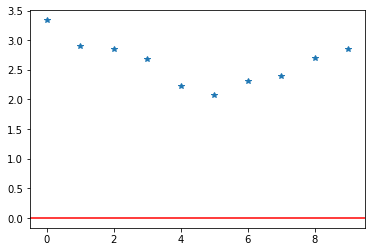

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


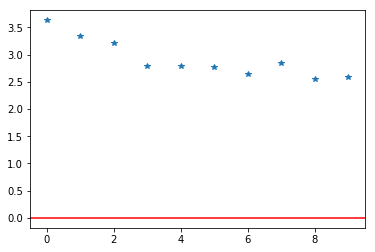

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


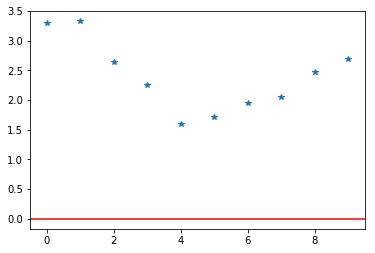

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


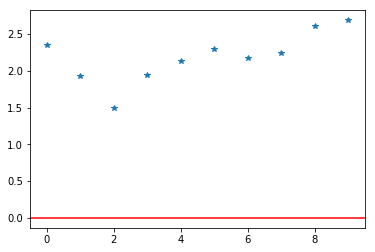

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


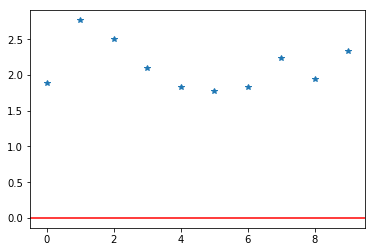

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


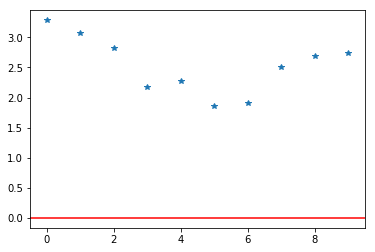

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


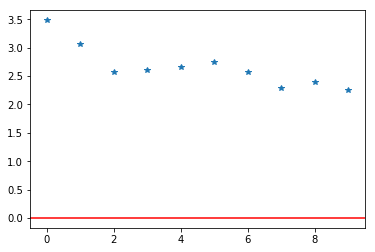

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


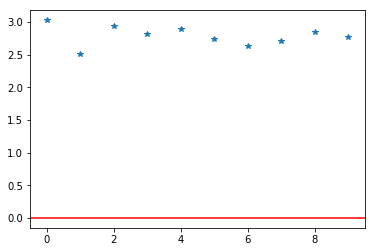

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


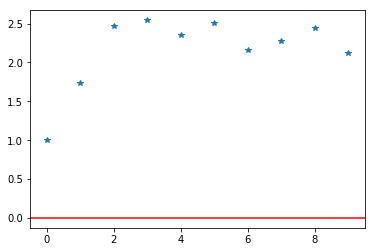

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


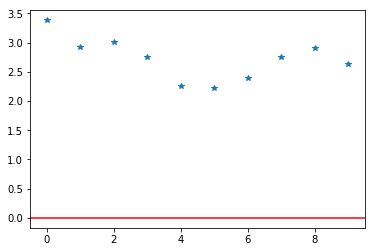

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


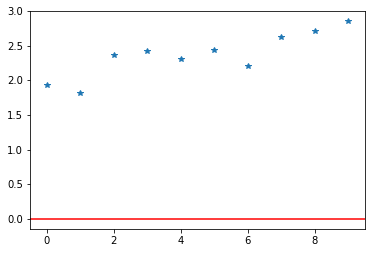

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


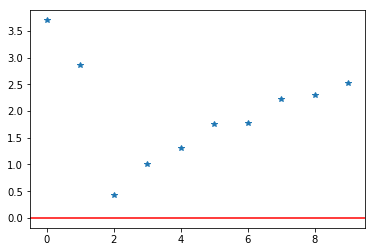

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


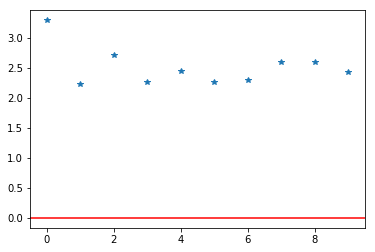

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


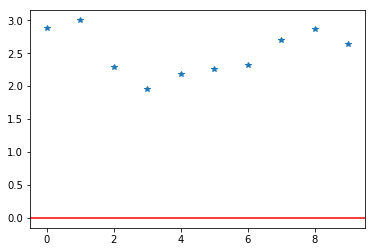

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


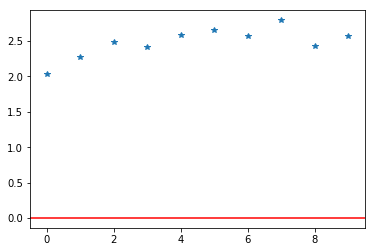

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


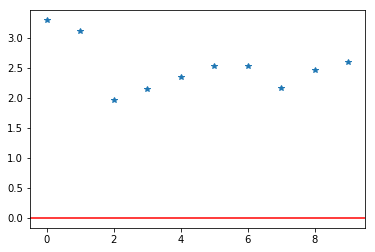

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


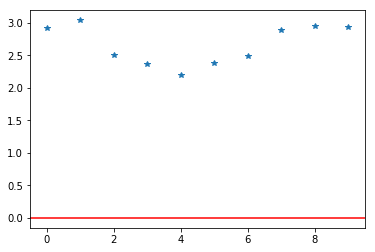

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


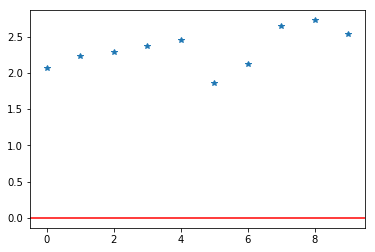

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


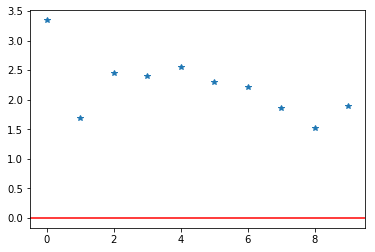

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


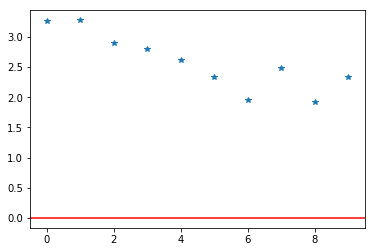

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


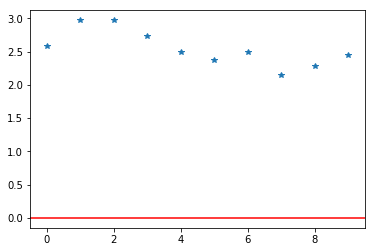

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


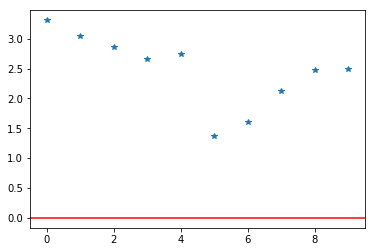

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


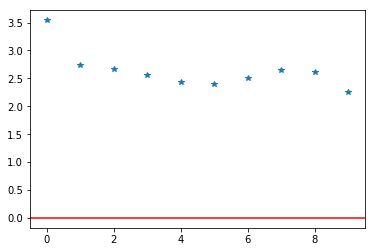

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


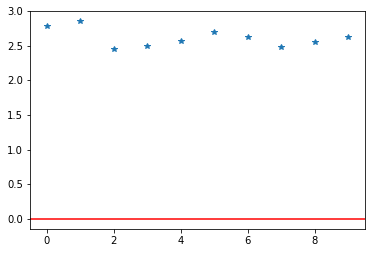

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


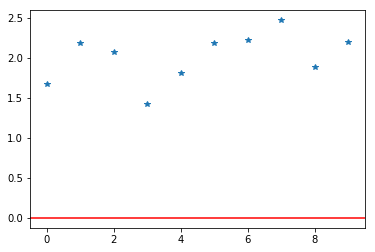

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


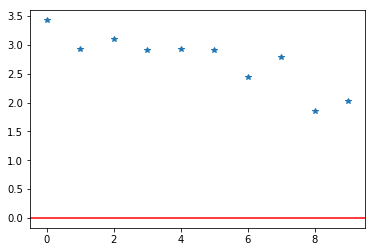

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


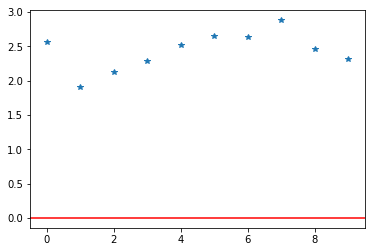

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


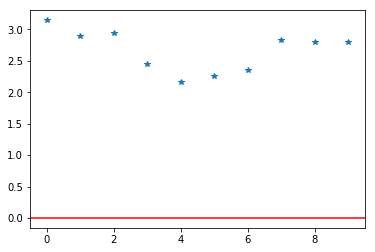

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [32]:
targets2d = targets.reshape((40,10))
for f in range(F):
    plt.plot(range(T), smoothed_scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()
    print(targets2d[f])

### MNIST anomalies example

In [3]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

print('X размера', X_train.shape, 'y размера', y_train.shape)

X размера (50000, 1, 28, 28) y размера (50000,)


In [4]:
X_train = X_train.reshape(-1, 28, 28)

In [5]:
X_train.shape

(50000, 28, 28)

выберем небольшой сэмпл

In [6]:
inds = np.random.choice(np.arange(len(X_train)), size=5000, replace=False)
X_sample = X_train[inds]
y_sample = y_train[inds]

будем считать как время вертикальную ось и искать аномалии вдоль горизонтальных линий изображений. То есть пространство для поиска аномалий бинарные вектора длины 28

Если взять больше 5 компонент то может не сойтись: произойдет разделение существующих кластеров и sklearn скажет об этом

In [7]:
%%time
detector = GaussianMixtureInTimeAnomalyDetector(n_components=5, random_state=1, tol=1e-6)
scores = detector.fit(X_sample)

  0%|          | 21/5000 [00:00<00:23, 209.37it/s]

Start probabilities memorization


 50%|████▉     | 2480/5000 [00:10<00:10, 245.98it/s]/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:129: RuntimeWarning: invalid value encountered in double_scalars
  self.__p_cluster_sample[cluster][time][series] = probs[cluster] / norma
100%|██████████| 5000/5000 [00:19<00:00, 255.78it/s]


CPU times: user 39.5 s, sys: 2.75 s, total: 42.3 s
Wall time: 42 s


сгладим оценки правдоподобия вдоль линии времени экспоненциальным сглаживанием с окном 4 строки

In [8]:
smoothed_scores = detector.smoothed_sample_anomalies(scores, halflife=4)

/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=4,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


посмотрим топ 50 аномалий 

In [11]:
top_anomaly = detector.find_anomalies(smoothed_scores, 
                                      strategy='series', anomaly_top=0.05)[0][:40]

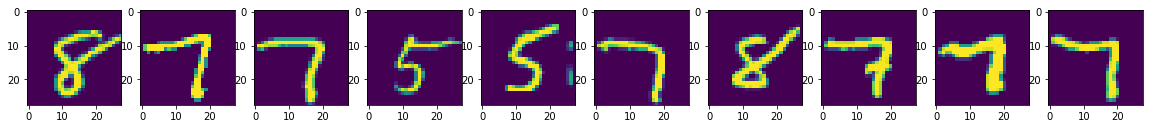

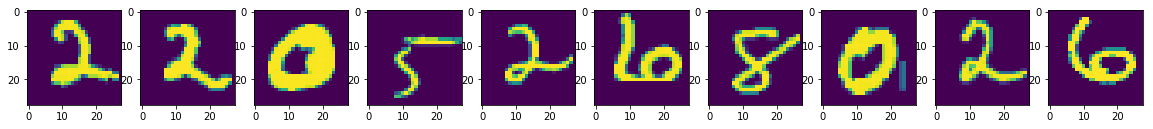

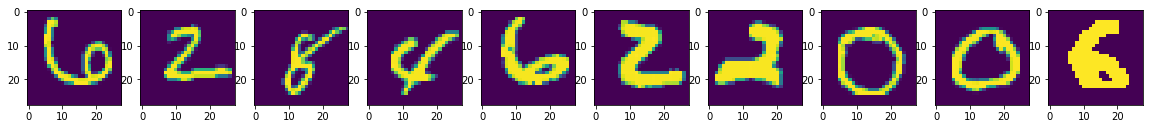

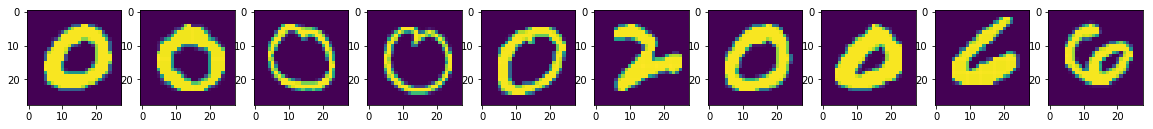

In [13]:
for i, item in enumerate(top_anomaly):
    if i % 10 == 0:
        plt.figure(figsize=(20, 3))
    num = item[1]
    score = item[0]
    plt.subplot(1, 10, i % 10 + 1)
    plt.imshow(X_sample[num])
    if i % 10 == 9:
        plt.show()
#     print('index: {}, class: {}'.format(num, y_sample[num]))

полученные цифры действительно выглядят аномально: в основном из-за слишком длинных хвостов у цифр 2,5,6,7 или толщины обода 0. bad_line показывает номер горизонтальной аномальной линии из за которой изображение и было признано аномальным

можно взглянуть именно на те линии которые считаются наиболее аномальными

In [60]:
from skimage.color import gray2rgb

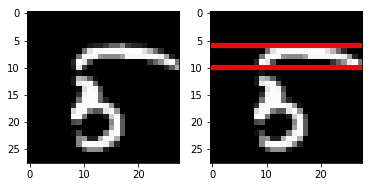

index: 4311, class: 5, bad_line: 10


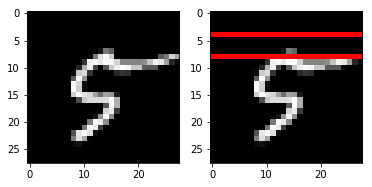

index: 2820, class: 5, bad_line: 8


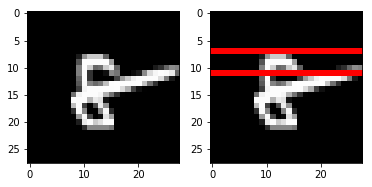

index: 3301, class: 8, bad_line: 11


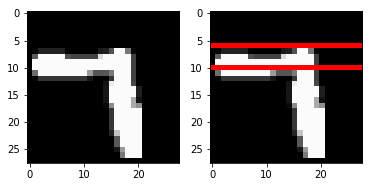

index: 122, class: 7, bad_line: 10


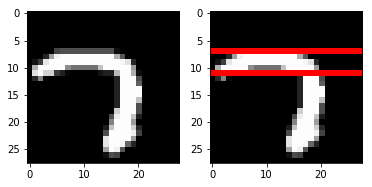

index: 1337, class: 7, bad_line: 11


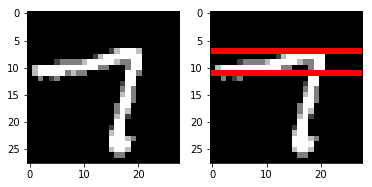

index: 534, class: 7, bad_line: 11


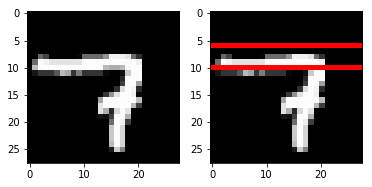

index: 4207, class: 7, bad_line: 10


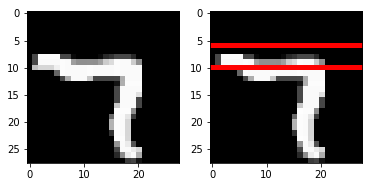

index: 3765, class: 7, bad_line: 10


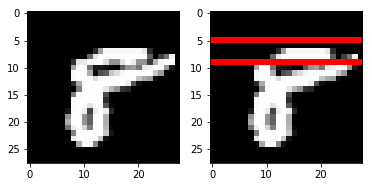

index: 4671, class: 8, bad_line: 9


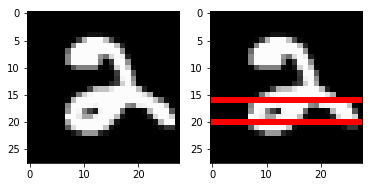

index: 57, class: 2, bad_line: 20


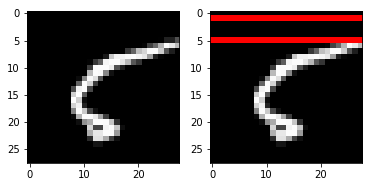

index: 1323, class: 5, bad_line: 5


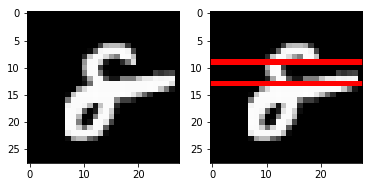

index: 3650, class: 8, bad_line: 13


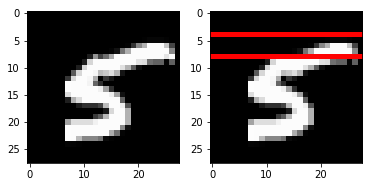

index: 1824, class: 5, bad_line: 8


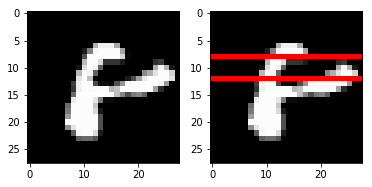

index: 2197, class: 8, bad_line: 12


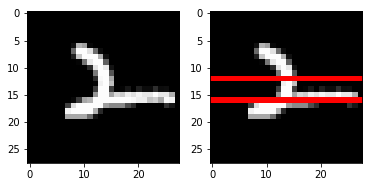

index: 161, class: 2, bad_line: 16


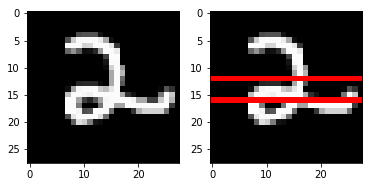

index: 985, class: 2, bad_line: 16


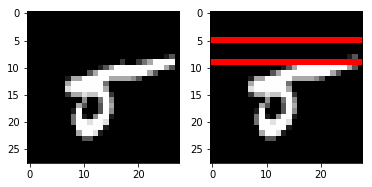

index: 668, class: 5, bad_line: 9


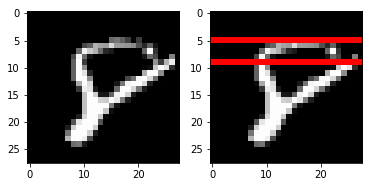

index: 3222, class: 8, bad_line: 9


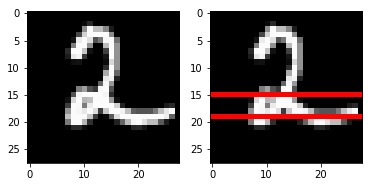

index: 1601, class: 2, bad_line: 19


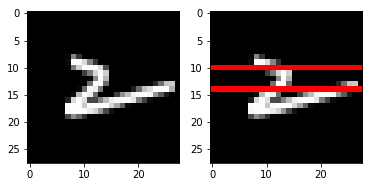

index: 2442, class: 2, bad_line: 14


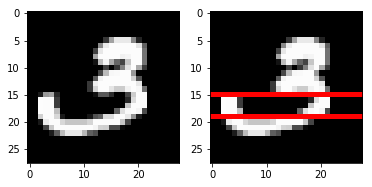

index: 4682, class: 3, bad_line: 19


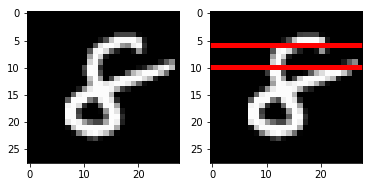

index: 3373, class: 8, bad_line: 10


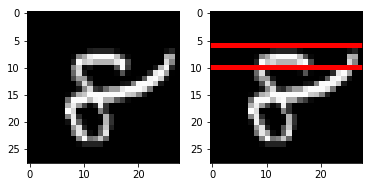

index: 1545, class: 8, bad_line: 10


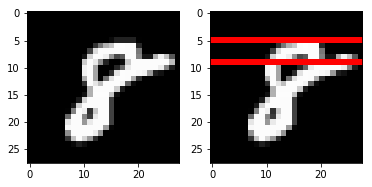

index: 1491, class: 8, bad_line: 9


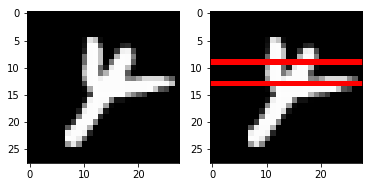

index: 4722, class: 4, bad_line: 13


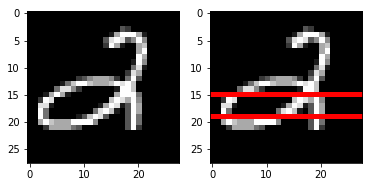

index: 1426, class: 2, bad_line: 19


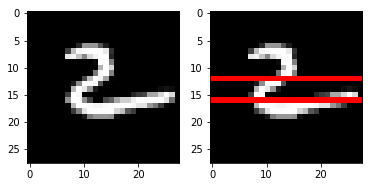

index: 1736, class: 2, bad_line: 16


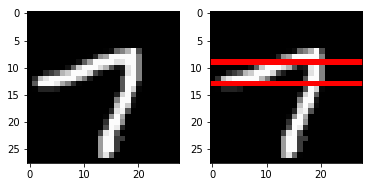

index: 4975, class: 7, bad_line: 13


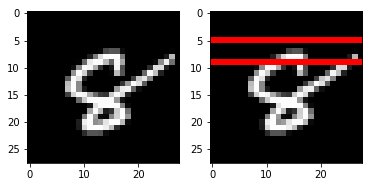

index: 1416, class: 8, bad_line: 9


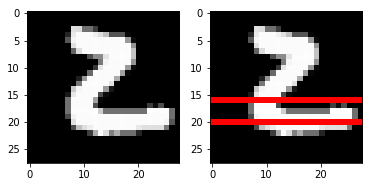

index: 3942, class: 2, bad_line: 20


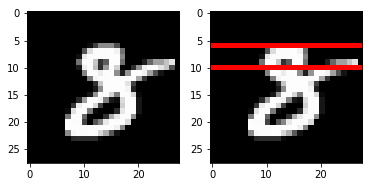

index: 4068, class: 8, bad_line: 10


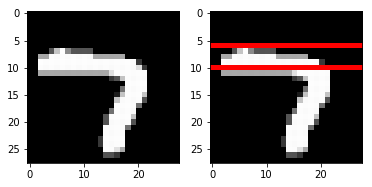

index: 4834, class: 7, bad_line: 10


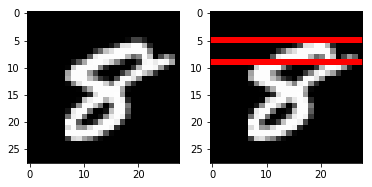

index: 258, class: 8, bad_line: 9


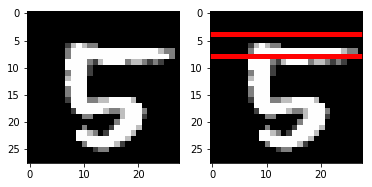

index: 4923, class: 5, bad_line: 8


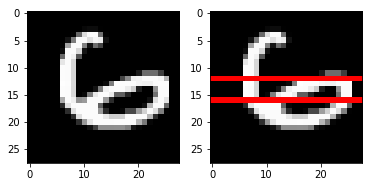

index: 3412, class: 6, bad_line: 16


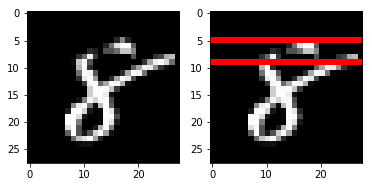

index: 3542, class: 8, bad_line: 9


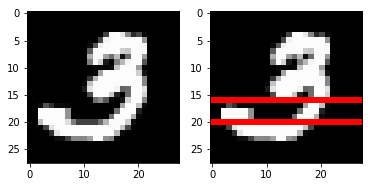

index: 2346, class: 3, bad_line: 20


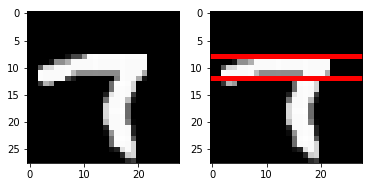

index: 2642, class: 7, bad_line: 12


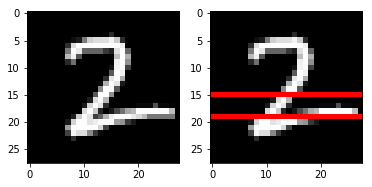

index: 2872, class: 2, bad_line: 19


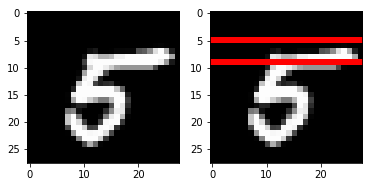

index: 4342, class: 5, bad_line: 9


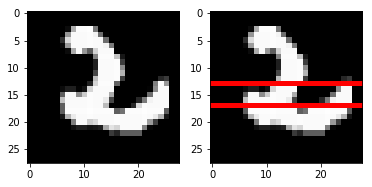

index: 2929, class: 2, bad_line: 17


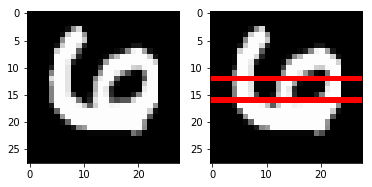

index: 3665, class: 6, bad_line: 16


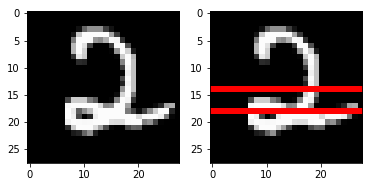

index: 2592, class: 2, bad_line: 18


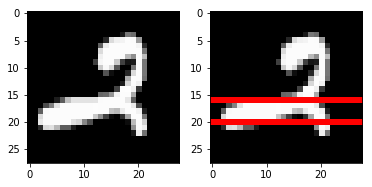

index: 1221, class: 2, bad_line: 20


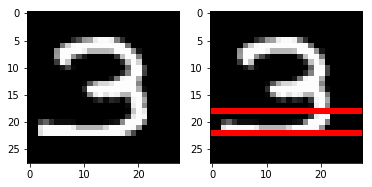

index: 1650, class: 3, bad_line: 22


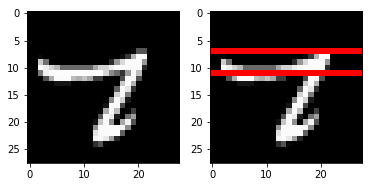

index: 1376, class: 7, bad_line: 11


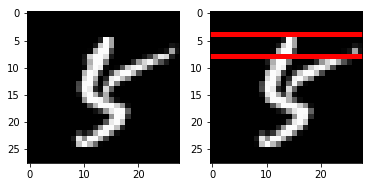

index: 4782, class: 5, bad_line: 8


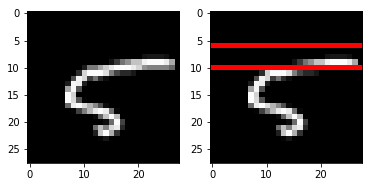

index: 1802, class: 5, bad_line: 10


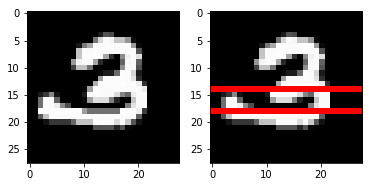

index: 837, class: 3, bad_line: 18


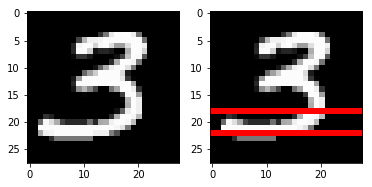

index: 2811, class: 3, bad_line: 22


In [67]:
imgs = set()
for item in detector.find_anomalies(smoothed_scores, 
                                      strategy='sample', anomaly_top=0.05)[0]:
    num = item[1][0]
    line = item[1][1]
    score = item[0]
    if num in imgs:
        continue
    imgs.add(num)
    if len(imgs) > 50:
        break
    img = gray2rgb(X_sample[num])
    plt.subplot(1,2,1)
    plt.imshow(img)
    img[max(0,line-4)][:, 1:3] = 255
    img[max(0,line-4)][:, 0] = 1
    img[line][:, 1:3] = 255
    img[line][:, 0] = 1
    plt.subplot(1,2,2)
    plt.imshow(img)
    plt.show()
    print('index: {}, class: {}, bad_line: {}'.format(num, y_sample[num], line))